In [5]:
### IMPORTS ###
# General imports
import os

# Data handling imports
from scipy import stats
import pandas as pd
import numpy as np
from datetime import datetime

# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

#---------------------------------------------------------------------------------
### LOAD DATA ###
# Open and read databases
luhansk_english = pd.read_feather("Luhansk.feather")
luhansk_russian = pd.read_feather("Луганск.feather")


<ipython-input-6-0b8d2e579312>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  day_luhansk_english = luhansk_english.timestamp.dt.to_period('D').value_counts().sort_index().reset_index().rename(columns={'timestamp':'Day', 'count':'English'})
<ipython-input-6-0b8d2e579312>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  day_luhansk_russian = luhansk_russian.timestamp.dt.to_period('D').value_counts().sort_index().reset_index().rename(columns={'timestamp':'Day', 'count':'Russian'})


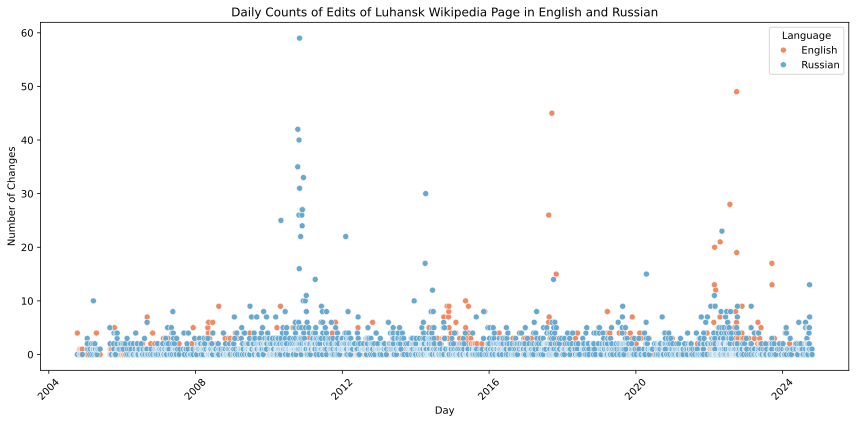

<Figure size 640x480 with 0 Axes>

In [6]:
# Count occurrences per day and prepare DataFrames
day_luhansk_english = luhansk_english.timestamp.dt.to_period('D').value_counts().sort_index().reset_index().rename(columns={'timestamp':'Day', 'count':'English'})
day_luhansk_russian = luhansk_russian.timestamp.dt.to_period('D').value_counts().sort_index().reset_index().rename(columns={'timestamp':'Day', 'count':'Russian'})

# Merge the two DataFrames
day_luhansk = pd.merge(left=day_luhansk_english, right=day_luhansk_russian, how='outer', on='Day').fillna(0)

day_luhansk['Day'] = day_luhansk['Day'].dt.to_timestamp()  # Ensure Day is in timestamp format

# Melt the DataFrame to long format for easier plotting with seaborn
day_luhansk_long = day_luhansk.melt(id_vars="Day", value_vars=["English", "Russian"], var_name="Language", value_name="Count")

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=day_luhansk_long, x="Day", y="Count", hue="Language", palette=["#ef8a62", "#67a9cf"])

# Adding labels and title
plt.xlabel("Day")
plt.ylabel("Number of Changes")
plt.title("Daily Counts of Edits of Luhansk Wikipedia Page in English and Russian")
plt.xticks(rotation=45)

plt.legend(title="Language")
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Save the plot as SVG
plt.savefig('day-time.jpg', format='jpg')

<ipython-input-7-89c91812f57b>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  month_luhansk_english = luhansk_english.timestamp.dt.to_period('M').value_counts().sort_index().reset_index().rename(columns={'timestamp':'Month', 'count':'English'})
<ipython-input-7-89c91812f57b>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  month_luhansk_russian = luhansk_russian.timestamp.dt.to_period('M').value_counts().sort_index().reset_index().rename(columns={'timestamp':'Month', 'count':'Russian'})


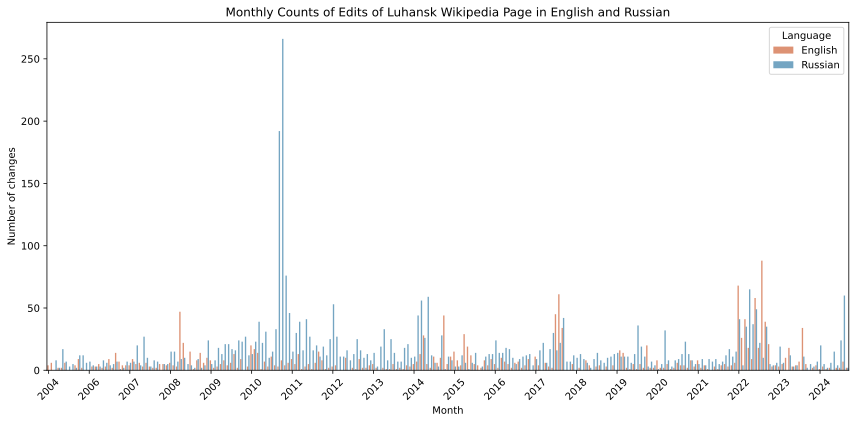

<Figure size 640x480 with 0 Axes>

In [7]:
# Count occurrences per year and prepare DataFrames
month_luhansk_english = luhansk_english.timestamp.dt.to_period('M').value_counts().sort_index().reset_index().rename(columns={'timestamp':'Month', 'count':'English'})
month_luhansk_russian = luhansk_russian.timestamp.dt.to_period('M').value_counts().sort_index().reset_index().rename(columns={'timestamp':'Month', 'count':'Russian'})

# Merge the two DataFrames
month_luhansk = pd.merge(left=month_luhansk_english, right=month_luhansk_russian, how='outer', on='Month').fillna(0)

# Melt the DataFrame to long format for easier plotting with seaborn
month_luhansk_long = month_luhansk.melt(id_vars="Month", value_vars=["English", "Russian"], var_name="Language", value_name="Count")

# Plotting the barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=month_luhansk_long, x="Month", y="Count", hue="Language", palette=["#ef8a62", "#67a9cf"])

# Adding labels and title
plt.xlabel("Month")
plt.ylabel("Number of changes")
plt.title("Monthly Counts of Edits of Luhansk Wikipedia Page in English and Russian")
plt.xticks(rotation=45)

# Set x-ticks to show every 12 months
xticks = month_luhansk_long['Month'].unique()
plt.xticks(ticks=range(0, len(xticks), 12), labels=xticks[::12].year, rotation=45)

plt.legend(title="Language")
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Save the plot as SVG
plt.savefig('month-time.pdf', format='pdf')

In [8]:
month_luhansk_long

,Month,Language,Count
0,2004-10,English,4.0
1,2004-11,English,6.0
2,2005-01,English,0.0
3,2005-02,English,2.0
4,2005-03,English,2.0
...,...,...,...
469,2024-06,Russian,15.0
470,2024-07,Russian,4.0
471,2024-08,Russian,24.0
472,2024-09,Russian,60.0


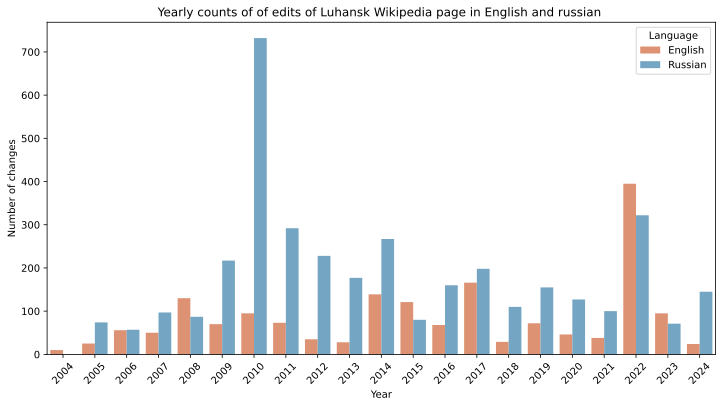

In [ ]:
# Count occurrences per year and prepare DataFrames
year_luhansk_english=luhansk_english.year.value_counts().sort_index().reset_index().rename(columns={'count':'English'})
year_luhansk_russian=luhansk_russian.year.value_counts().sort_index().reset_index().rename(columns={'count':'Russian'})

# Plot histogram with KDE for English data
year_luhansk=pd.merge(left=year_luhansk_english, right=year_luhansk_russian, how='outer', on='year').fillna(0)

# Melt the DataFrame to long format for easier plotting with seaborn
year_luhansk_long = year_luhansk.melt(id_vars="year", value_vars=["English", "Russian"], var_name="Language", value_name="Count")

# Plotting the barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=year_luhansk_long, x="year", y="Count", hue="Language", palette=["#ef8a62", "#67a9cf"])

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Number of changes")
plt.title("Yearly counts of of edits of Luhansk Wikipedia page in English and russian ")
plt.xticks(rotation=45)
plt.legend(title="Language")

# Save the plot as SVG
plt.savefig('year-time.pdf', format='pdf')

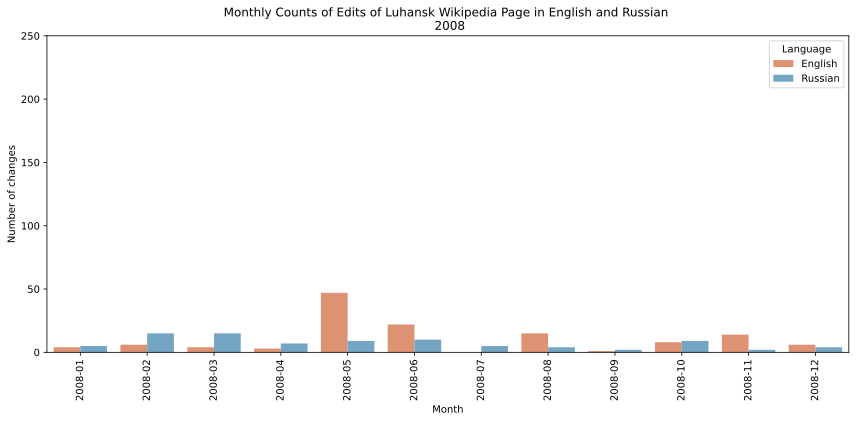

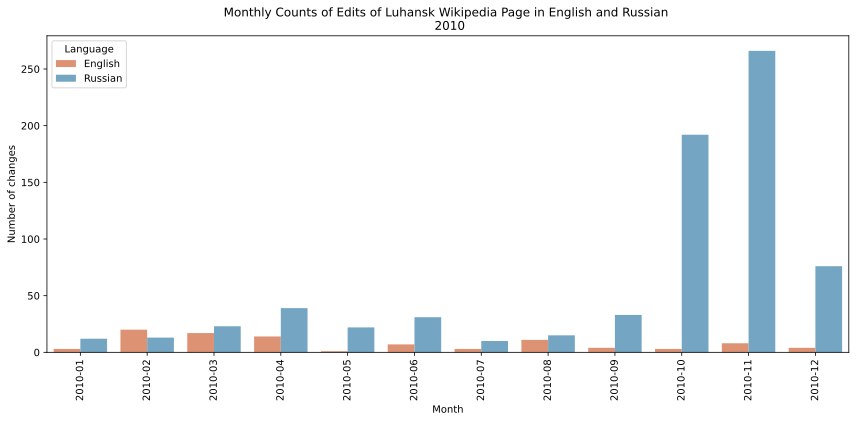

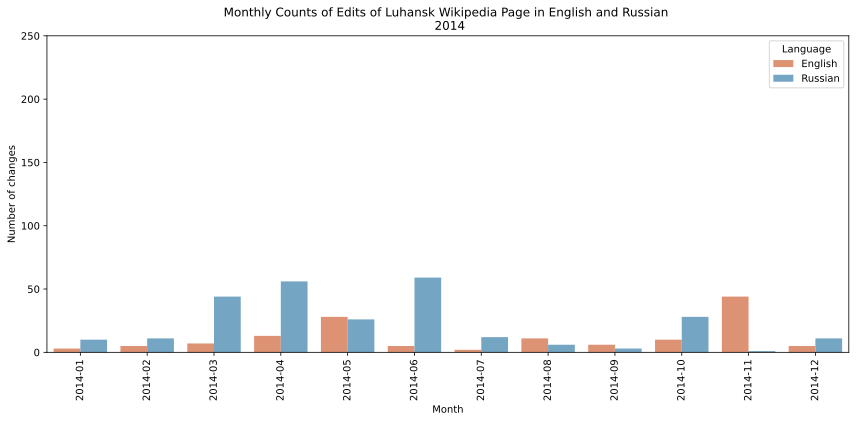

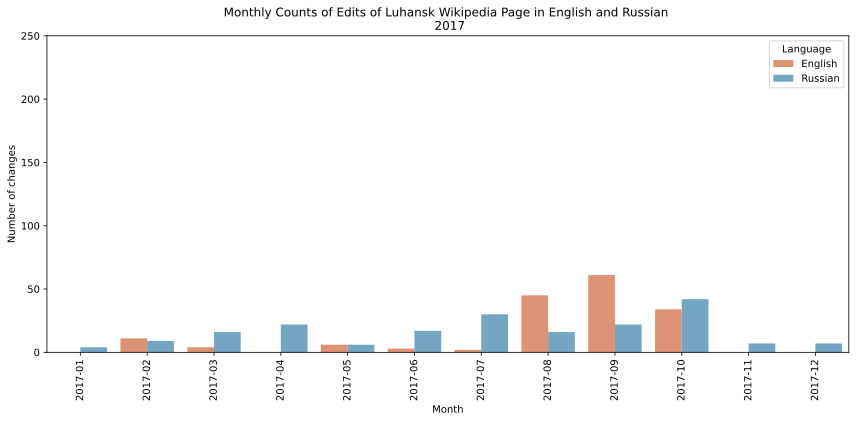

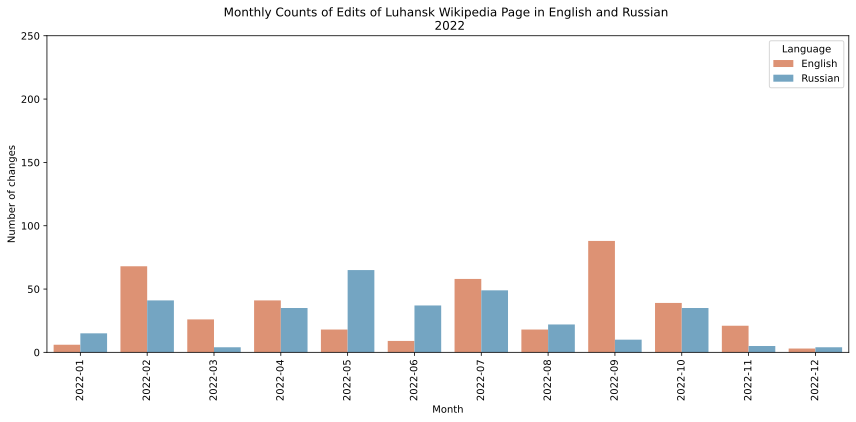

In [ ]:
# List of years to iterate over
years = [2008, 2010, 2014, 2017, 2022]

# Iterate over each year to create a barplot for that year
for year in years:
    plt.figure(figsize=(12, 6))

    # Filtering the data for the specific year
    yearly_data = month_luhansk_long[(month_luhansk_long['Month'] >= f"{year}-01") &
                                     (month_luhansk_long['Month'] <= f"{year}-12")]

    # Plotting the barplot
    sns.barplot(data=yearly_data, x="Month", y="Count", hue="Language", palette=["#ef8a62", "#67a9cf"])

    # Adding labels and title
    plt.xlabel("Month")
    plt.ylabel("Number of changes")
    plt.title(f"Monthly Counts of Edits of Luhansk Wikipedia Page in English and Russian \n {year}")
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, 300, 50))

    plt.legend(title="Language")
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()